In [1]:
import numpy as pd 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:

df = pd.read_csv('Household_power_consumption.csv', sep=',')    

df.head()

df.info()
print("\n")
print("data null \n",df.isnull().sum())
print("data kosong \n",df.empty)
print("data nan \n",df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   datetime               object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
 8   sub_metering_4         float64
dtypes: float64(8), object(1)
memory usage: 142.5+ MB


data null 
 datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64
data kosong 
 False
data nan 
 datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Su

In [18]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')


df['datetime']=pd.to_datetime(df['datetime']) 
df['year'] = df['datetime'].apply(lambda x: x.year)
df['quarter'] = df['datetime'].apply(lambda x: x.quarter)
df['month'] = df['datetime'].apply(lambda x: x.month)
df['day'] = df['datetime'].apply(lambda x: x.day)

df=df.loc[:,['datetime','Global_active_power', 'year','quarter','month','day']]
df.sort_values('datetime', inplace=True, ascending=True)
df = df.reset_index(drop=True)


In [107]:
print(df.shape)
print(df.datetime.min())
print(df.datetime.max())
df.tail(5)

(2075259, 6)
2006-12-16 17:24:00
2010-11-26 21:02:00


,datetime,Global_active_power,year,quarter,month,day
2075254,2010-11-26 20:58:00,0.946,2010,4,11,26
2075255,2010-11-26 20:59:00,0.944,2010,4,11,26
2075256,2010-11-26 21:00:00,0.938,2010,4,11,26
2075257,2010-11-26 21:01:00,0.934,2010,4,11,26
2075258,2010-11-26 21:02:00,0.932,2010,4,11,26


In [108]:
import seaborn as sns



Text(0.5, 1.0, 'Global Active Power Distribution')

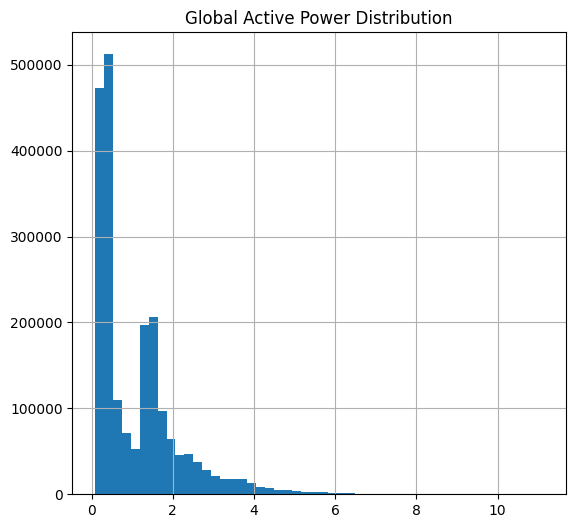

In [109]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Global_active_power'].hist(bins=50)
plt.title('Global Active Power Distribution')


Text(0.5, 1.0, 'Mean Global Active Power by Month(2007 - 2010)')

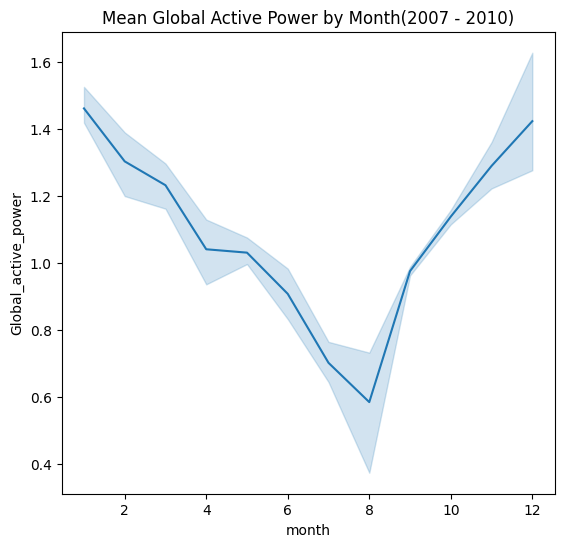

In [110]:
df_analisis = df.groupby(['year','month'])['Global_active_power'].mean().reset_index()
df_analisis.head()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.lineplot(data=df_analisis[df_analisis['year']!=2006], x='month', y='Global_active_power')
plt.title('Mean Global Active Power by Month(2007 - 2010)')


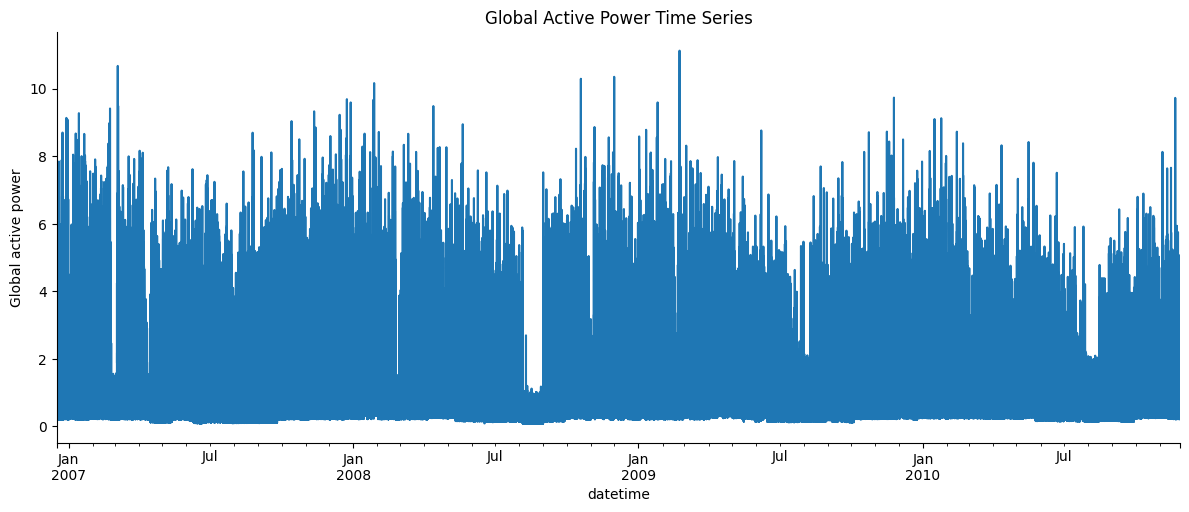

In [111]:
df1=df.loc[:,['datetime','Global_active_power']]
df1.set_index('datetime',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Global active power')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Global Active Power Time Series')
sns.despine(top=True)
plt.show();

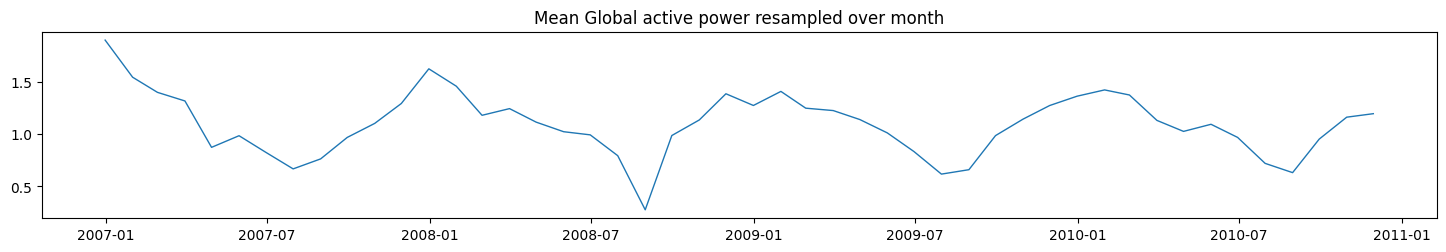

In [112]:
#Pembagian Resampled Data perbulan

fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)

ax3 = fig.add_subplot(5,1,1)
ax3.plot(df1['Global_active_power'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Global active power resampled over month')
ax3.tick_params(axis='both', which='major')


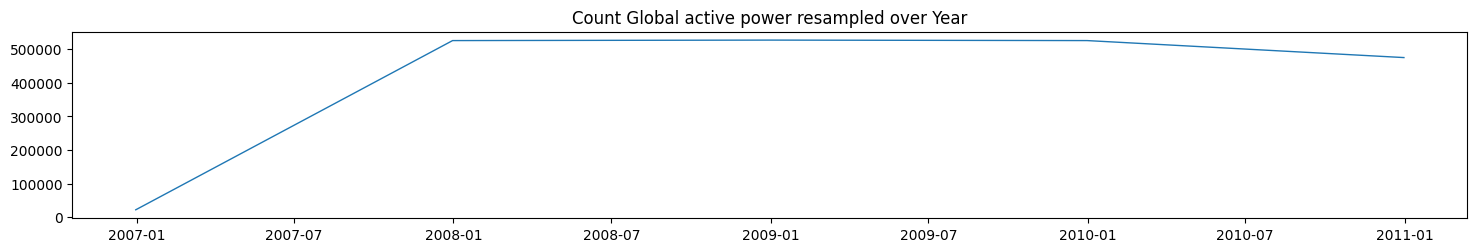

In [123]:

fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)

ax = fig.add_subplot(5,1,1)
ax.plot(df1['Global_active_power'].resample('Y').count(),linewidth=1)
ax.set_title('Count Global active power resampled over Year')
ax.tick_params(axis='both', which='major')





In [97]:
df2 = df.groupby(['year',])['Global_active_power'].count().reset_index()
df2.head()




,year,Global_active_power
0,2006,21996
1,2007,525600
2,2008,527040
3,2009,525600
4,2010,475023


<BarContainer object of 12 artists>

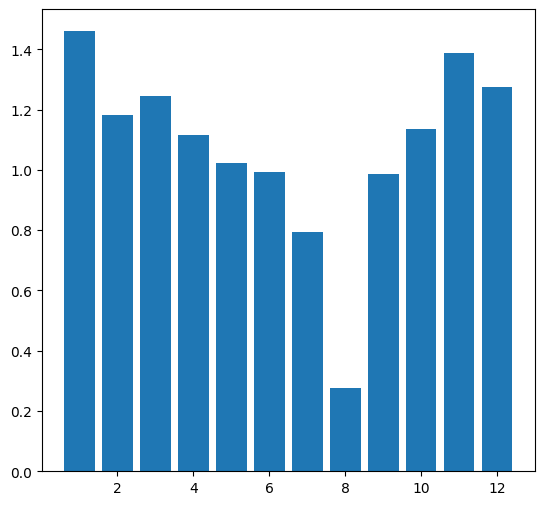

In [132]:
#mengambil data pada tahun 2008
df3 = df.loc[:,['year','month','day','Global_active_power']]
df3.head()

df3 = df3[df3['year']==2008]


df_mean = df3.groupby(['month'])['Global_active_power'].mean().reset_index()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.bar(df_mean['month'],df_mean['Global_active_power'])



<BarContainer object of 31 artists>

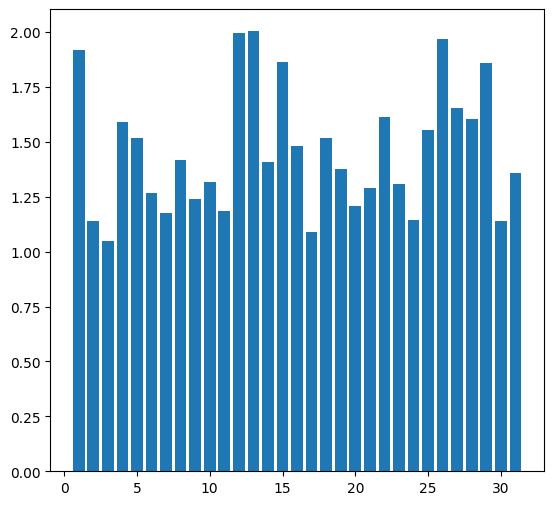

In [134]:
#mengambil data pada bulan januari (bulan ke 1)
df4 = df3[df3['month']==1]

df_mean2 = df4.groupby(['day'])['Global_active_power'].mean().reset_index()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.bar(df_mean2['day'],df_mean2['Global_active_power'])

In [139]:
#dataset untuk prediksi dan training
df4.head()



,year,month,day,Global_active_power
547596,2008,1,1,1.620
547597,2008,1,1,1.626
547598,2008,1,1,1.622
547599,2008,1,1,1.612
547600,2008,1,1,1.612


In [167]:
dataset = df4.Global_active_power.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]




In [168]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [169]:
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [170]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [171]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping


In [172]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)
# Training Phase
model.summary()

Epoch 1/20
510/510 [==============================] - 6s 6ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 2/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0012 - val_loss: 9.7343e-04
Epoch 7/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0011 - val_loss: 9.3514e-04
Epoch 8/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0011 - val_loss: 9.1561e-04
Epoch 9/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0010 - val_loss: 9.3730e-04
Epoch 10/20
510/510 [==============================] - 2s 4ms/step - loss: 0.0011 - 

In [173]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

279/279 [==============================] - 1s 2ms/step
Train Mean Absolute Error: 0.10960037847939766
Train Root Mean Squared Error: 0.2803981839915813
Test Mean Absolute Error: 0.11626935444006
Test Root Mean Squared Error: 0.2949425543446109


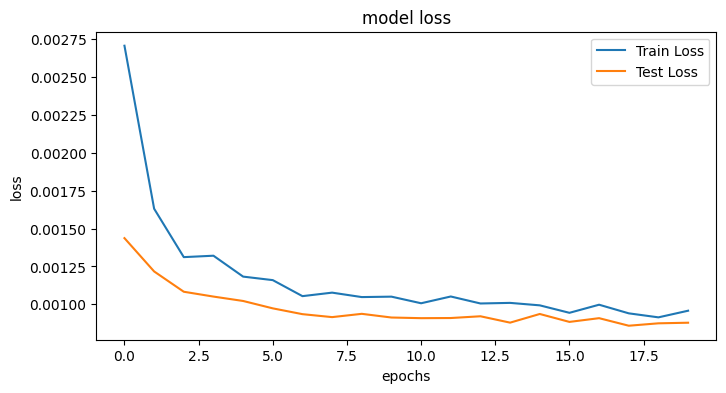

In [174]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

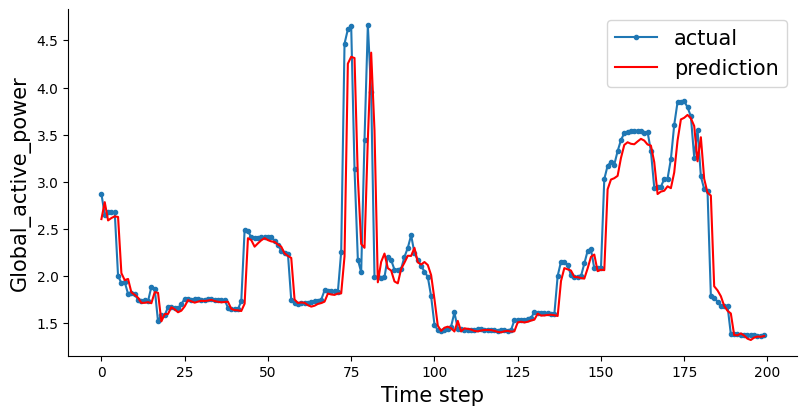

In [175]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")


plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();